# Exercise.
Implement an End to End CNN Model for Image Classification Task.
Objective



# Task 1: Data Understanding and Visualization:

Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:


• Get the list of class directories from the train folder.

• Select one image randomly from each class.

• Display the images in a grid format with two rows using matplotlib.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image

In [19]:
#train image data
train_df = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-5/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-5/FruitinAmazon/test"

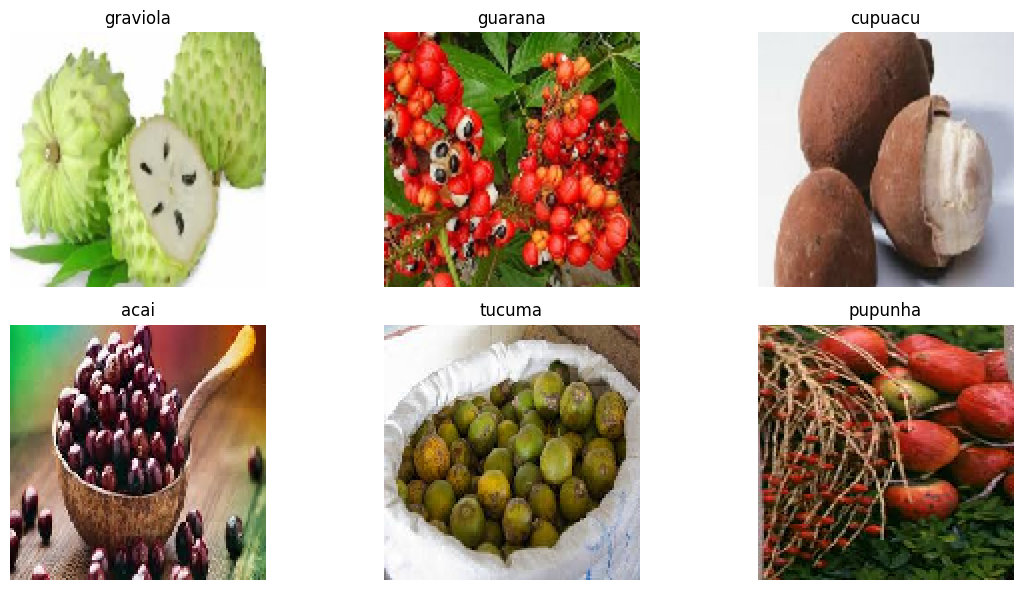

In [22]:
def visualize_images(dataset_path):
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    fig, axes = plt.subplots(2, len(class_dirs)//2, figsize=(12, 6))
    axes = axes.flatten()

    for i, class_name in enumerate(class_dirs):
        class_path = os.path.join(dataset_path, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(128, 128))
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_images(train_df)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”

In [23]:
# Check for corrupted images and remove them
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()  # Verify if image is valid
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print list of corrupted images if any
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [25]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with

Follow the following Structure and Hyper - parameters:
# Convolutional Architecture:

# • Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:

ReLU activation

# • Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

# • Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:
ReLU activation

# • Pooling Layer 2:
Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

# Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,030 (910.27 KB)

 Trainable params: 233,030 (910.27 KB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model


Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).



# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.

• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [30]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.1250 - loss: 123.9038

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.1250 - loss: 136.7660 - val_accuracy: 0.2222 - val_loss: 215.6936
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.2043 - loss: 181.1320

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.2088 - loss: 172.4735 - val_accuracy: 0.2778 - val_loss: 57.7270
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.3455 - loss: 41.3438

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.3424 - loss: 40.9173 - val_accuracy: 0.2778 - val_loss: 31.8948
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.4138 - loss: 18.9974

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.4214 - loss: 18.5447 - val_accuracy: 0.2222 - val_loss: 9.4016
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.4589 - loss: 4.5491

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.4657 - loss: 4.5058 - val_accuracy: 0.3333 - val_loss: 5.6970
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5903 - loss: 3.0582

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.5885 - loss: 3.0080 - val_accuracy: 0.4444 - val_loss: 3.6359
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6354 - loss: 1.3297

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.6328 - loss: 1.2879 - val_accuracy: 0.3333 - val_loss: 2.4247
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8397 - loss: 0.4470

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.8416 - loss: 0.4538 - val_accuracy: 0.3889 - val_loss: 2.1660
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8646 - loss: 0.3978

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.8672 - loss: 0.3913 - val_accuracy: 0.5000 - val_loss: 2.1189
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - accuracy: 0.9627 - loss: 0.2523 - val_accuracy: 0.4444 - val_loss: 2.3682
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 1.0000 - loss: 0.1818 - val_accuracy: 0.4444 - val_loss: 2.5598
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 1.0000 - loss: 0.1122 - val_accuracy: 0.3889 - val_loss: 2.5262
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 1.0000 - loss: 0.0489 - val_accuracy: 0.4444 - val_loss: 2.5306
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.4444 - val_loss: 2.5994
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.4444 - val_loss: 2.7044
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.5556 - val_lo

# Task 5: Evaluate the Model

# Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [32]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5000 - loss: 2.1189
Test Accuracy: 0.5000
Test Loss: 2.1189


# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

# Task 7: Predictions and Classification Report

# Making Predictions

• Use model.predict() to make predictions on test images.
• Convert the model’s predicted probabilities to digit labels using np.argmax().
• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [33]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

# Task 8: Predictions and Classification Report
**Making Predictions**

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

• Also use from "sklearn.metrics import classification report" to report the Classification Report of your Model Performance.

In [35]:
from sklearn.metrics import classification_report

In [36]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
              precision    recall  f1-score   support

        acai       0.33      1.00      0.50         3
     cupuacu       1.00      0.25      0.40         4
    graviola       1.00      1.00      1.00         1
     guarana       0.60      1.00      0.75         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.50      0.33      0.40         3

    accuracy                           0.50        18
   macro avg       0.57      0.60      0.51        18
weighted avg       0.52      0.50      0.42        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
